<a href="https://colab.research.google.com/github/dadulya/Work-_with_time_series_in_Python-/blob/main/Work__with_time_series_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 0. У каждой ячеки ниже будет номер для соответствия пояснений в учебном пособии.

In [7]:
# 1. Подключение нужных для работы моделей
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [8]:
# 2. Получение и чтение файла из облака
# адрес - когда копируете ссылку из Google drive, она выглядит обычно вот так:
#   https://drive.google.com/open?id=1FoSS-guXOsGUbE0xHcKR-E9ZEaTmc9Wv
# или так:
#   https://drive.google.com/file/d/1FoSS-guXOsGUbE0xHcKR-E9ZEaTmc9Wv/view?usp=sharing
# чтобы обрабатывать данные в программе, нужно ссылку переделать в следующий вид:
#   https://drive.google.com/uc?export=download&id=...
# то есть взять id из ссылки, как ее дал Google Drive и вставить в шаблон https://drive.google.com/open?id=

url = "https://docs.google.com/uc?export=download&id=1R-bDTTCsLjzy9NZG3bkzzeNnFyBuupGK"

# чтение данных, можно указать символ разделения столбцов (sep) и многие другие параметры, 
# index_col показывает, какой столбец нужно использовать как индекс строки в таблице

input_df = pd.read_csv(url, sep = ';', index_col = None, nrows = 2035) 

# вывод заголовка таблицы и первых пяти строк (сэмплов)
input_df.head()

,Forecast,Station_A,Station_B,Station_C,Station_D
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [9]:
# 3. Просмотр последних строк таблицы
input_df.tail()

,Forecast,Station_A,Station_B,Station_C,Station_D
2030,98.0,94.505781,96.573668,100.364881,97.951305
2031,81.4,74.998184,81.617090,86.100435,75.348833
2032,59.5,55.411577,60.507418,58.663632,62.632440
2033,33.8,32.165879,35.196717,32.858797,34.694654
2034,7.5,7.706458,6.935870,6.977503,7.287369


In [10]:
# 4. Получение базовых статистических показателей
input_df.describe()

,Forecast,Station_A,Station_B,Station_C,Station_D
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000
mean,25.551794,25.611636,25.504026,25.537623,25.596606
std,34.217238,34.360856,34.199689,34.263350,34.343093
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.450000,55.120224,55.029140,54.780797,55.074871
max,111.300000,118.831845,114.113682,116.256226,118.541045


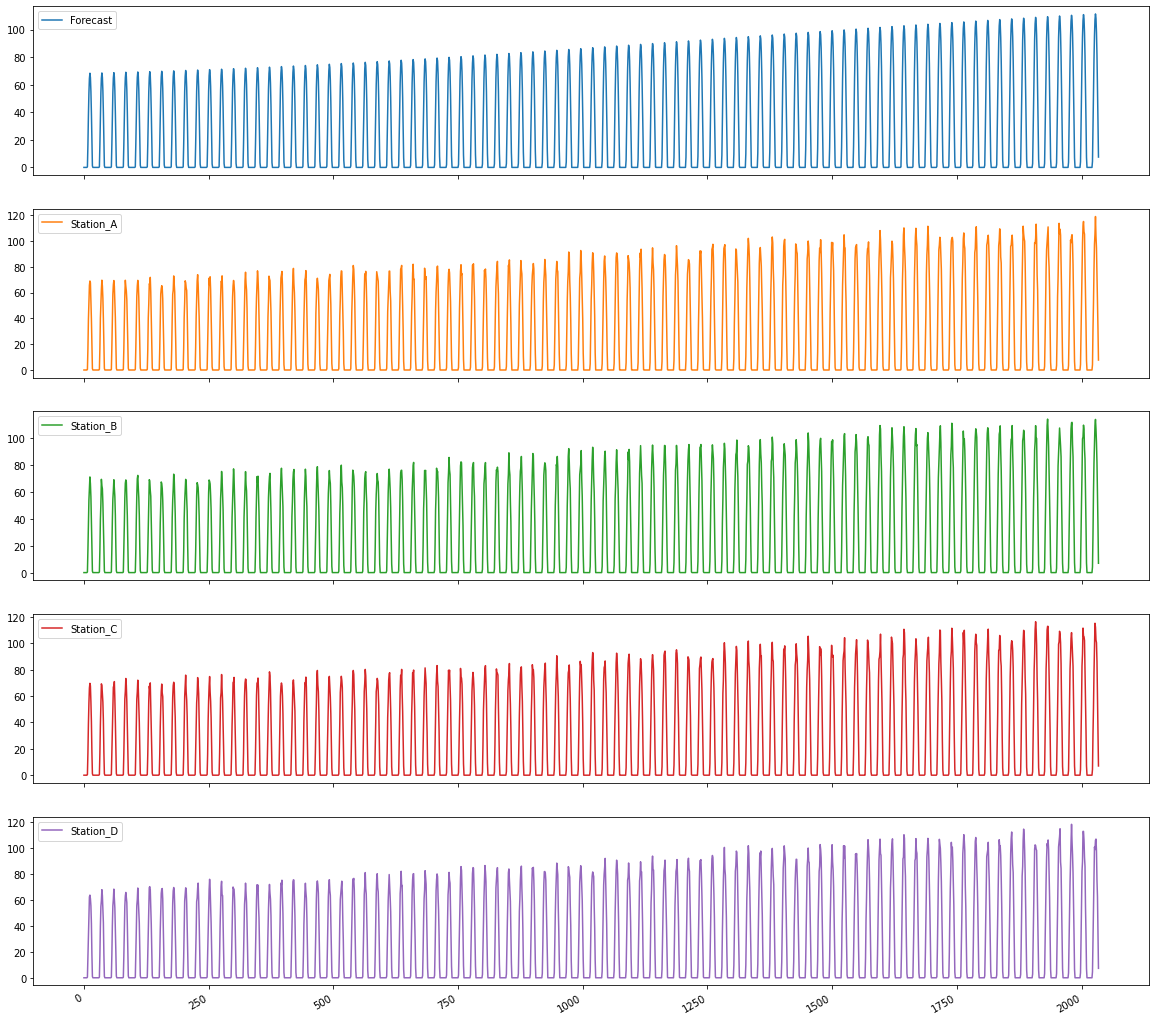

In [11]:
# 5. Можно сразу построить графики
axes = input_df.plot(marker=None, figsize=(20, 20), subplots = True)

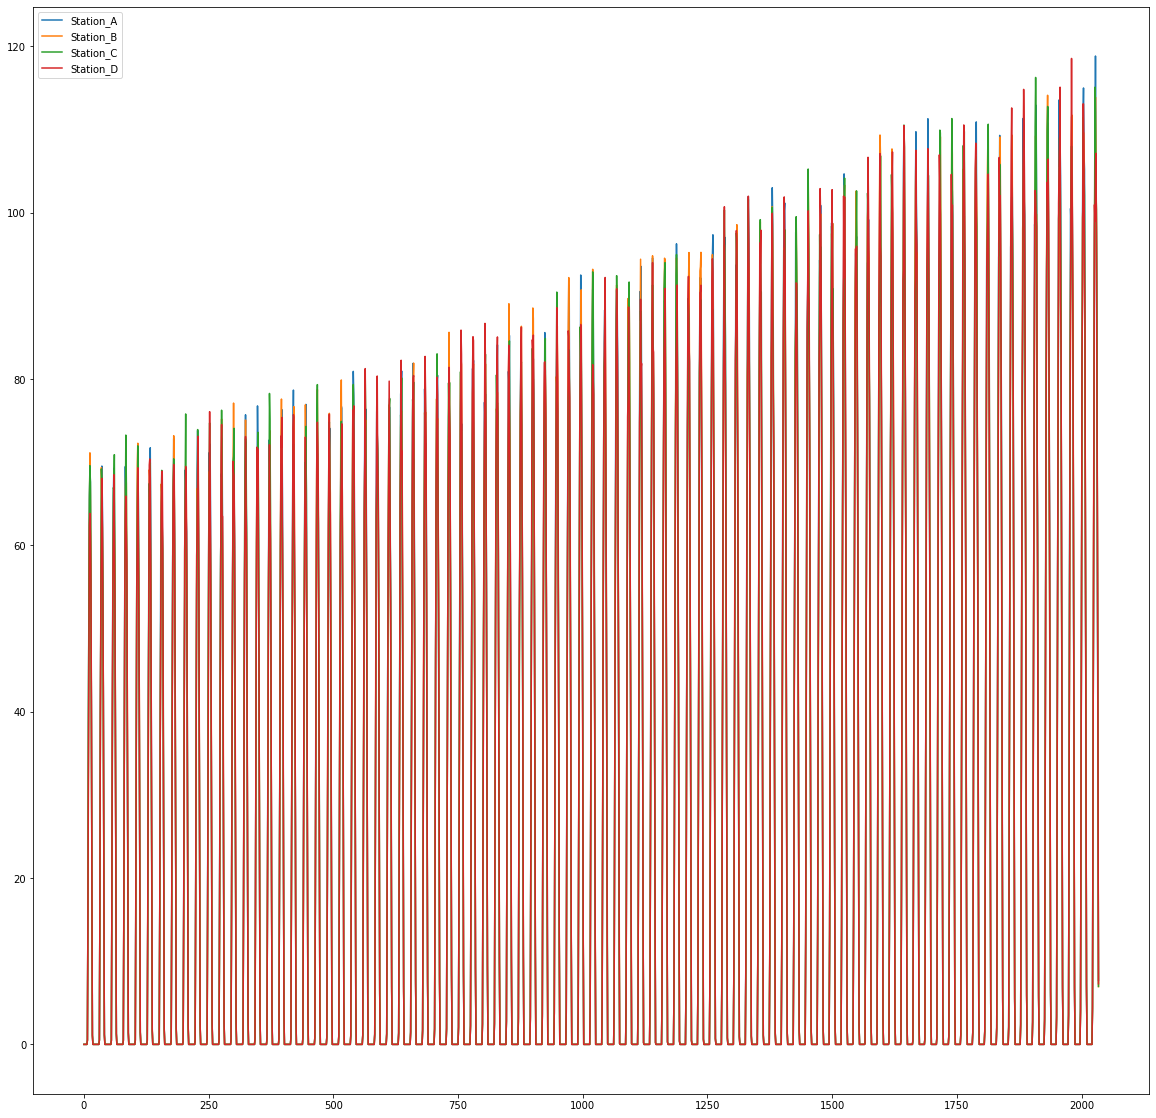

In [12]:
# 6. Можно построить все вместе, заодно удалив индекс строк, так как его график не несет информации.
# input_df[input_df.columns[ 1 : ]] - означает что нужно взять из исходной таблицы только столбцы с 1-го и до последнего. 
# так как в Python индексация с нуля - то нулевой столбец с индексами не будет использован
axes = input_df[input_df.columns[ 1 : ]].plot(marker=None, figsize=(20, 20), subplots = False)

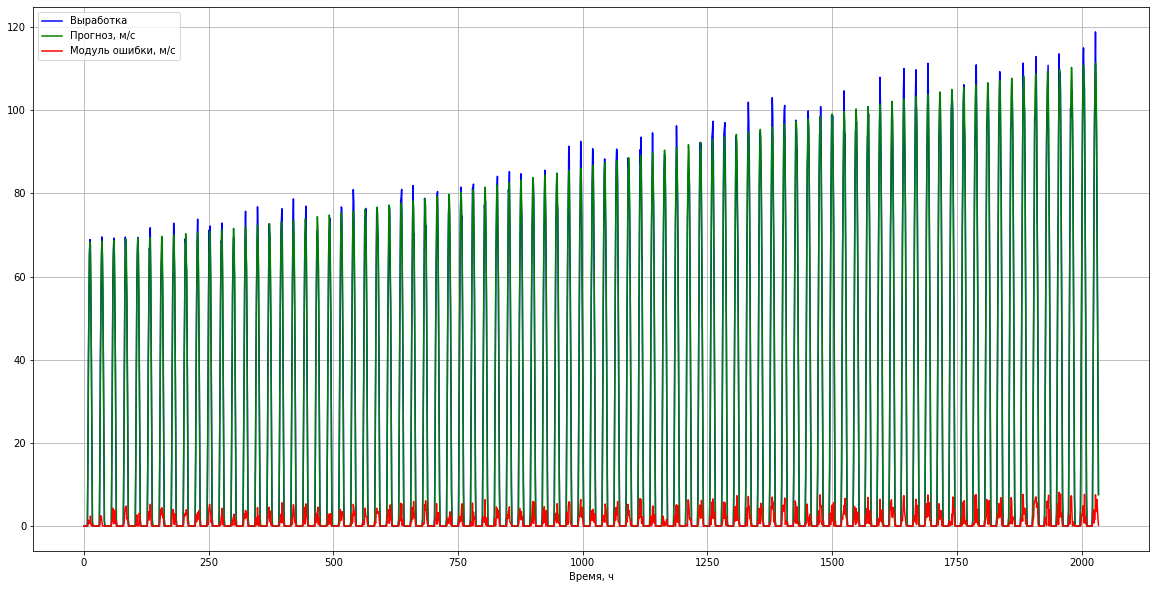

In [15]:
solar_station_id = 1


forecast = input_df.iloc[: , 0].values
solar = input_df.iloc[: , solar_station_id].values

# вывод графиков
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(solar, 'blue')
ax.plot(forecast, 'green')
ax.plot(np.abs(forecast - solar), 'red')

ax.grid(True)
ax.set_xlabel('Время, ч') 
ax.legend(['Выработка', 'Прогноз, м/с', 'Модуль ошибки, м/с'])


# полученный прогноз можно сохранить в текстовый csv файл или в Excel формат
data_frame = pd.DataFrame(forecast)
data_frame.to_excel('forecast.xlsx', index = False, header = ['solar_forecast_m/s'])
data_frame.to_csv('forecast.csv', index = False, header = ['solar_forecast_m/s'])


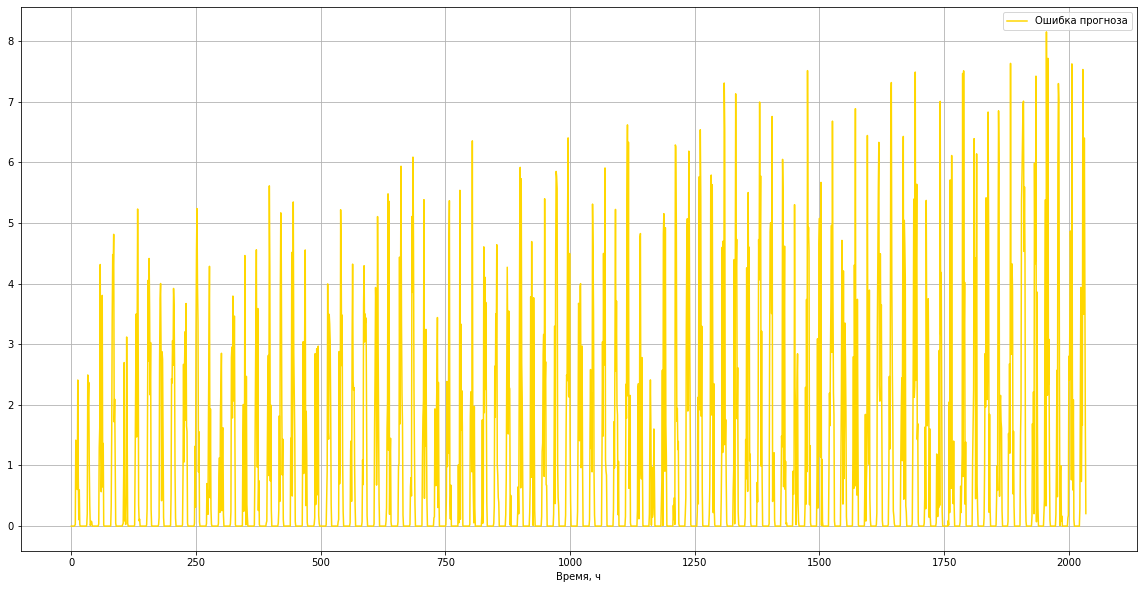

In [14]:
fig, ax = plt.subplots(figsize = (20, 10))
error = abs((forecast - solar)) #ошибка прогноза
ax.plot(error, 'gold' )

ax.grid(True)
ax.set_xlabel('Время, ч') 
ax.legend(['Ошибка прогноза'])



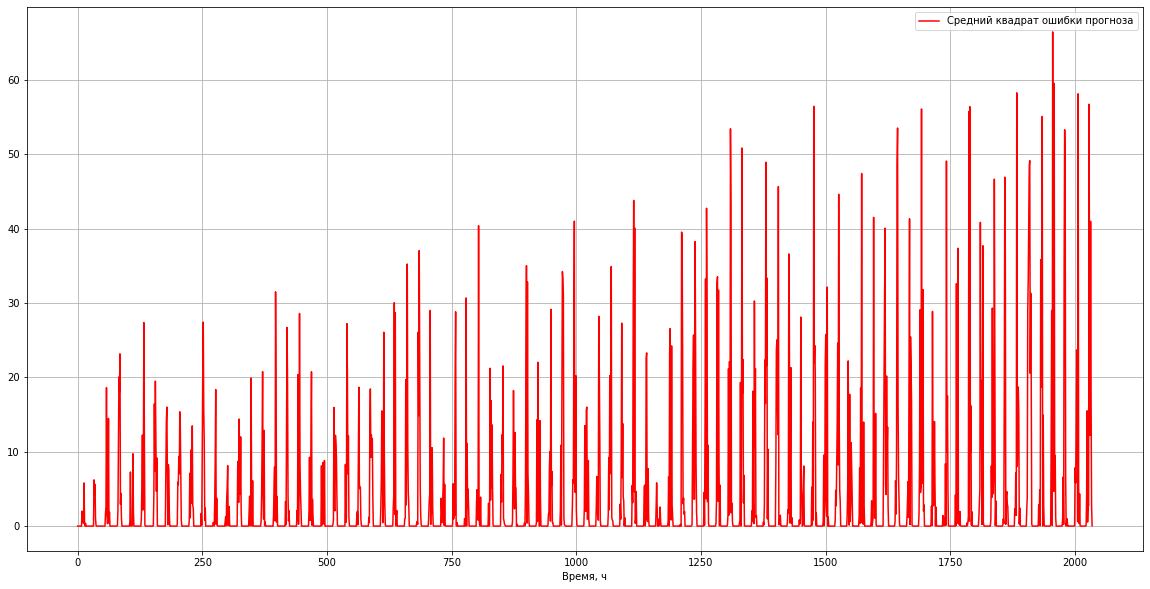

In [16]:
fig, ax = plt.subplots(figsize = (20, 10))


error_2 = (forecast - solar)**2  #средний квадрат ошибки
ax.plot(error_2, 'red' )
ax.grid(True)
ax.set_xlabel('Время, ч') 
ax.legend([ 'Средний квадрат ошибки прогноза'])

In [17]:
error_2.mean()

3.848827606653276

In [18]:
#Интерактивный график 
#График ошибок прогноза для solar_station_id 

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(error)), error, line_width = 2)



show(p)